In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'googleplaystore.csv',
 'GooglePlayStore_SweetViz_report.html',
 'in1__automated_EDA_approaches.ipynb',
 'in2__analysis_preprocessing.ipynb']

In [4]:
%autosave 60

Autosaving every 60 seconds


### dataset link: https://www.kaggle.com/datasets/lava18/google-play-store-apps

In [5]:
df = pd.read_csv("googleplaystore.csv")
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [6]:
df.shape

### Decent dataset with 10,481 records and 13 columns

(10841, 13)

In [7]:
### Looking at random 10 records of this datset

df.sample(10)

App            Category  Rating  Reviews  \
1815      TerraGenesis - Space Colony                GAME     4.3    38957   
9646                       EO Network            BUSINESS     3.5       13   
7040        BZ Berner Zeitung E-Paper  NEWS_AND_MAGAZINES     NaN        4   
7883        HEAD TRAUMA CT EVALUATION             MEDICAL     4.5       18   
10082                      EY TaxChat             FINANCE     1.2       44   
3385   Hola Launcher- Theme,Wallpaper     PERSONALIZATION     4.5  3277209   
2708   Gyft - Mobile Gift Card Wallet            SHOPPING     4.1     9701   
9696                    EP RSS Reader       COMMUNICATION     3.8        4   
3554           To-Do Calendar Planner        PRODUCTIVITY     4.2    30291   
5384               The Sims™ FreePlay              FAMILY     4.3   931503   

                     Size      Installs  Type Price Content Rating  \
1815   Varies with device    1,000,000+  Free     0       Everyone   
9646                  21M        1,000+  Free     0           Teen   
7040   Varies with device        1,000+  Free     0       Everyone   
7883                  13M       10,000+  Free     0       Everyone   
10082                 27M        1,000+  Free     0       Everyone   
3385                 7.6M  100,000,000+  Free     0       Everyone   
2708                  14M      500,000+  Free     0       Everyone   
9696                 892k          100+  Free     0       Everyone   
3554   Varies with device    1,000,000+  Free     0       Everyone   
5384                  31M   10,000,000+  Free     0           Teen   

                 Genres        Last Updated         Current Ver  \
1815         Simulation      August 2, 2018              4.9.31   
9646           Business  September 20, 2017               1.0.3   
7040   News & Magazines       July 30, 2018               5.1.1   
7883            Medical      March 16, 2018                 2.0   
10082           Finance       April 9, 2018              3.24.0   
3385    Personalization         May 9, 2018               3.2.5   
2708           Shopping       July 25, 2018               2.4.0   
9696      Communication       July 16, 2018                0.99   
3554       Productivity        May 29, 2018  Varies with device   
5384         Simulation       July 16, 2018              5.39.1   

              Android Ver  
1815   Varies with device  
9646           4.4 and up  
7040           4.1 and up  
7883         4.0.3 and up  
10082          6.0 and up  
3385           4.0 and up  
2708           4.4 and up  
9696         4.0.3 and up  
3554   Varies with device  
5384         4.0.3 and up

In [8]:
df.info()

### Seems only 1 numerical column 
# and rest of 'em are `Categoricals`.

# but there are few columns that should've been numericals but are here in categorical forms. We'll deal w them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
df1=df.copy(deep=True)
df1.head()

## It's just a knack but I'll do evry operation on a deep copy of the original dataset so that the changes won't be 
# reflected in it.

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [10]:
df1.drop_duplicates(inplace=True)

In [11]:
df1.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [12]:
### Numerical columns

num_cols = [col for col in df1.columns if df1[col].dtype != 'O']
df1[num_cols].head()

Rating
0     4.1
1     3.9
2     4.7
3     4.5
4     4.3

In [13]:
### Categorical columns

cat_cols = [col for col in df1.columns if df1[col].dtype == 'O']
df[cat_cols].head()

App        Category Reviews  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     159   
1                                Coloring book moana  ART_AND_DESIGN     967   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   87510   
3                              Sketch - Draw & Paint  ART_AND_DESIGN  215644   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     967   

   Size     Installs  Type Price Content Rating                     Genres  \
0   19M      10,000+  Free     0       Everyone               Art & Design   
1   14M     500,000+  Free     0       Everyone  Art & Design;Pretend Play   
2  8.7M   5,000,000+  Free     0       Everyone               Art & Design   
3   25M  50,000,000+  Free     0           Teen               Art & Design   
4  2.8M     100,000+  Free     0       Everyone    Art & Design;Creativity   

       Last Updated         Current Ver   Android Ver  
0   January 7, 2018               1.0.0  4.0.3 and up  
1  January 15, 2018               2.0.0  4.0.3 and up  
2    August 1, 2018               1.2.4  4.0.3 and up  
3      June 8, 2018  Varies with device    4.2 and up  
4     June 20, 2018                 1.1    4.4 and up

### # Having a look at unique categories of the `Categorical columns`

In [14]:
cat_cols

['App',
 'Category',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [15]:
# App column

df['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [16]:
# Categoru column

df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [17]:
# Reviews column

df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [18]:
# Size column

df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [19]:
# Installs column

df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [20]:
# Type column

df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [21]:
# Price column

df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [22]:
# Content Rating column

df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [23]:
# Genres column

df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [24]:
# Last Updated column

df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [25]:
# Last Updated column

df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [26]:
# Current Ver column (won't be of much use, can be discarded)

df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [27]:
# Android Ver column (won't be of much use, can be discarded)

df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

### # Dropping irrelevant columns:

In [28]:
### Dropping the versions columns

df1.drop(columns=['Current Ver', 'Android Ver'], inplace=True)

In [29]:
df[cat_cols].head()

App        Category Reviews  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     159   
1                                Coloring book moana  ART_AND_DESIGN     967   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   87510   
3                              Sketch - Draw & Paint  ART_AND_DESIGN  215644   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     967   

   Size     Installs  Type Price Content Rating                     Genres  \
0   19M      10,000+  Free     0       Everyone               Art & Design   
1   14M     500,000+  Free     0       Everyone  Art & Design;Pretend Play   
2  8.7M   5,000,000+  Free     0       Everyone               Art & Design   
3   25M  50,000,000+  Free     0           Teen               Art & Design   
4  2.8M     100,000+  Free     0       Everyone    Art & Design;Creativity   

       Last Updated         Current Ver   Android Ver  
0   January 7, 2018               1.0.0  4.0.3 and up  
1  January 15, 2018               2.0.0  4.0.3 and up  
2    August 1, 2018               1.2.4  4.0.3 and up  
3      June 8, 2018  Varies with device    4.2 and up  
4     June 20, 2018                 1.1    4.4 and up

In [30]:
df1['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [31]:
df1['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [32]:
df1['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [33]:
df1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

### Observations: 

1. Seemingly there are some `categorical` columns which I believe should've been better if they were in `numerical` form. we'll deal with them.<br>Those columns are: **Reviews**, **Size**, **Installs** and **Price**.
2. There are 'M's representing millions of reviews in the `Reviews` column and we've gotta deal with it.
3. commas(,) and plus signs(+) can be removed from the column `Installs` and the column can be converted into numerical dtype.
4. There's 'M' for MBs and 'k' for KBs in the `size` column and they could've been get rid of for the betterment and we'll do the same and transform the column into numerical form. 
5. `$` can be removed from the `Price` column and there are some enteries containing `Everyone` which can be dealt with and eventually the column can be transformed into `numerical` stype.

Thus, there's some scope of `data cleaning`.

### Seemingly there are some `categorical` columns which I believe should've been in the `numerical` form. Let's have a look at 'em and transform them anyway accordingly.

**Those columns:** `Reviews`, `Size`, `Installs`, and `Price`

- ### Dealing with the `Reviews` column

In [34]:
df1['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [35]:
# faulty entries

[i for i in df1['Reviews'] if i.endswith('M')]

['3.0M']

In [36]:
def replace_M(reviews):
    """
    A function to replace the `M` for millions by 1,000,000.
    """
    cleaned_reviews=[]
    for r in reviews:
        if r.endswith('M'):
            cleaned = r.replace(r, str( float(r[:len(r)-1])*1000000 )) # replacing the whole val by val*1000000
            cleaned_reviews.append(float(cleaned))
        else:
            cleaned_reviews.append(float(r))
    return cleaned_reviews

In [37]:
df1['Reviews'] = replace_M(df1['Reviews'])

In [38]:
df1.info()

### Reviews column handled

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  float64
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
dtypes: float64(2), object(9)
memory usage: 971.1+ KB


- ### Dealing with `Installs` column.

**Commas(,) and plus signs(+) can be removed from the column `Installs` and the column can be converted into numerical dtype.**

In [39]:
df1['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [40]:
[i for i in df['Installs'] if i=='Free']

### since there's only single entry containing 'Free' install, it's better to drop it.

['Free']

In [41]:
df1.drop(df1[df1['Installs'] == 'Free'].index, inplace=True)

In [42]:
### Just gotta remove ','s and '+'s

def cleanInstalls(installs):
    """
    A function to remove ','s and '+'s from the entries of the `Installs` column and convert its entries into int.
    """
    clean_installs = []
    for i in installs:
        i1 = i.replace(',', '')
        i2 = i1.replace('+', '')
        clean_installs.append(int(i2))
    return clean_installs

In [43]:
df1['Installs'] = cleanInstalls(df1['Installs'])

In [44]:
df1.info()

### `Installs` column handled

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  float64
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 971.0+ KB


- ### Dealing w `Size` column.

**There's 'M' for MBs and 'k' for KBs in the size column and they could've been get rid of for the betterment and we'll do the same and transform the column into numerical form. There are some entries containing 'Varies with device' and it's better to replace them with "np.nan" and further we'll imput them.**

**Note:** 1 MB = 1024 KB, so I'll convert the entries containing 'K's into MBs form.

In [45]:
df1['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [46]:
len([i for i in df1['Size'] if i=='Varies with device'])

## 1695 records containing 'Varies with device' so it won't be apt to drop them.

1526

In [47]:
def cleanedSizes(sizes):
    """
    A function to get rid of 'M's and 'K's in the entries of the 'Size' column.
    """
    cleaned_sizes = [] 
    for s in sizes:
        if s.endswith('M'):
            s1 = s.replace('M', '')
            cleaned_sizes.append(s1)
        elif s.endswith('k'):
            s1 = s.replace(s[:], str( float(s[:len(s)-1])/1024) )
            cleaned_sizes.append(s1)
        else:
            cleaned_sizes.append(np.nan) # for the entries containing 'varies with device'
    return cleaned_sizes         

In [48]:
df1['Size'] = cleanedSizes(df1['Size'])

In [49]:
### renaming the column 'Size' to 'Size (in MB)'

df1.rename(columns={'Size': 'Size (in MB)'}, inplace=True)

In [50]:
# Transforming the 'Size' column into 'numerical' dtype
df1['Size (in MB)'] = df1['Size (in MB)'].astype(float)

df1.info()

### 'Size' column cleaned and is renamed to 'Size (in MB)'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  float64
 4   Size (in MB)    8831 non-null   float64
 5   Installs        10357 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 971.0+ KB


- ### Dealing w `Price`

**Will get rid of `$`s in the `Price` column and transform its datatype into `numerical` dtype.**


In [51]:
df1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [52]:
def cleanedPrice(prices):
    """
    A function to get rid of the `$`s from the entries of the 'Price' column.
    """
    cleaned_prices=[]
    for price in prices:
        if price.startswith('$'):
            p = price.replace('$', '')
            cleaned_prices.append(p)
        else:
            cleaned_prices.append(price)
    return cleaned_prices

In [53]:
df1['Price'] = cleanedPrice(df1['Price'])

In [54]:
### Renaming the `Price` column to `Price (in $)` and transforming it into 'numerical' dtype

df1.rename(columns={'Price': 'Price (in $)'}, inplace=True)
df1['Price (in $)'] = df1['Price (in $)'].astype(float)

In [55]:
df1.dtypes

### `Price` column cleaned!

App                object
Category           object
Rating            float64
Reviews           float64
Size (in MB)      float64
Installs            int64
Type               object
Price (in $)      float64
Content Rating     object
Genres             object
Last Updated       object
dtype: object

### # New Cleaned Dataset:

In [56]:
df1.sample(10)

App       Category  \
1165                     Bank of America Mobile Banking        FINANCE   
2977  The Team - Live Sport: football, tennis, rugby ..         SPORTS   
9888                            Speed Racing Ultimate 2           GAME   
4731                         Flashlight Free w/ compass          TOOLS   
2099                             Cars: Lightning League         FAMILY   
2941           InstaSize Photo Filters & Collage Editor    PHOTOGRAPHY   
9060                              Dress Up RagazzA13 DX         FAMILY   
9813                                                RAR          TOOLS   
9607      PokerStars Play: Free Texas Holdem Poker Game           GAME   
9285                                        EF Sidekick  VIDEO_PLAYERS   

      Rating   Reviews  Size (in MB)  Installs  Type  Price (in $)  \
1165     4.4  341090.0          53.0  10000000  Free          0.00   
2977     4.2  112725.0           NaN   5000000  Free          0.00   
9888     4.1   66894.0           NaN   1000000  Free          0.00   
4731     4.0      75.0           1.9     10000  Free          0.00   
2099     4.5   58795.0          77.0  10000000  Free          0.00   
2941     4.3  811714.0          50.0  50000000  Free          0.00   
9060     3.5      13.0          42.0       100  Paid          0.99   
9813     4.4  669901.0           NaN  50000000  Free          0.00   
9607     4.6   14989.0          78.0    500000  Free          0.00   
9285     3.1      36.0           NaN      5000  Free          0.00   

     Content Rating                     Genres        Last Updated  
1165       Everyone                    Finance       July 31, 2018  
2977       Everyone                     Sports       July 31, 2018  
9888   Everyone 10+                     Racing       July 21, 2018  
4731       Everyone                      Tools      March 15, 2017  
2099       Everyone  Racing;Action & Adventure        May 21, 2018  
2941       Everyone                Photography      August 2, 2018  
9060       Everyone                 Simulation  September 16, 2016  
9813       Everyone                      Tools      August 7, 2018  
9607           Teen                       Card        July 6, 2018  
9285       Everyone    Video Players & Editors      March 20, 2017

### # describing the dataset

In [57]:
### describing the numerical part of the daatset

df1.describe()

Rating       Reviews  Size (in MB)      Installs  Price (in $)
count  8892.000000  1.035700e+04   8831.000000  1.035700e+04  10357.000000
mean      4.187877  4.059046e+05     21.287413  1.415776e+07      1.030800
std       0.522377  2.696778e+06     22.540591  8.023955e+07     16.278625
min       1.000000  0.000000e+00      0.008301  0.000000e+00      0.000000
25%       4.000000  3.200000e+01      4.700000  1.000000e+03      0.000000
50%       4.300000  1.680000e+03     13.000000  1.000000e+05      0.000000
75%       4.500000  4.641600e+04     29.000000  1.000000e+06      0.000000
max       5.000000  7.815831e+07    100.000000  1.000000e+09    400.000000

In [58]:
### describing the categorical part of the dataset

cats = df1.dtypes[df1.dtypes == 'object'].index  # Categorical columns

df1[cats].describe()

App Category   Type Content Rating Genres    Last Updated
count    10357    10357  10356          10357  10357           10357
unique    9659       33      2              6    119            1377
top     ROBLOX   FAMILY   Free       Everyone  Tools  August 3, 2018
freq         9     1943   9591           8382    842             298

### # Checking missing vals

In [59]:
df1.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size (in MB)      1526
Installs             0
Type                 1
Price (in $)         0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

**# Dropping the missing entry of the `Type` column**

In [60]:
### Since there's only one entry of `Type` column containing the missing val, we can drop it without a second thought.

x = df1['Type'][df1['Type'].isnull()].index
x

Int64Index([9148], dtype='int64')

In [61]:
df1.drop(x, inplace=True)

### missing entry of the `Type` column dropped as a whole record from the datset

In [62]:
## Checking the quantity of missing records 
df1[df1.isnull().any(axis=1)]

### So there are 3110 records containing `missing` values in either of the columns

App             Category  Rating  \
23                        Mcqueen Coloring pages       ART_AND_DESIGN     NaN   
37                            Floor Plan Creator       ART_AND_DESIGN     4.1   
42                    Textgram - write on photos       ART_AND_DESIGN     4.4   
52                 Used Cars and Trucks for Sale    AUTO_AND_VEHICLES     4.6   
67                            Ulysse Speedometer    AUTO_AND_VEHICLES     4.3   
...                                          ...                  ...     ...   
10826  Frim: get new friends on local chat rooms               SOCIAL     4.0   
10831                   payermonstationnement.fr  MAPS_AND_NAVIGATION     NaN   
10835                                   FR Forms             BUSINESS     NaN   
10838                     Parkinson Exercices FR              MEDICAL     NaN   
10839              The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE     4.5   

        Reviews  Size (in MB)  Installs  Type  Price (in $) Content Rating  \
23         61.0           7.0    100000  Free           0.0       Everyone   
37      36639.0           NaN   5000000  Free           0.0       Everyone   
42     295221.0           NaN  10000000  Free           0.0       Everyone   
52      17057.0           NaN   1000000  Free           0.0       Everyone   
67      40211.0           NaN   5000000  Free           0.0       Everyone   
...         ...           ...       ...   ...           ...            ...   
10826   88486.0           NaN   5000000  Free           0.0     Mature 17+   
10831      38.0           9.8      5000  Free           0.0       Everyone   
10835       0.0           9.6        10  Free           0.0       Everyone   
10838       3.0           9.5      1000  Free           0.0       Everyone   
10839     114.0           NaN      1000  Free           0.0     Mature 17+   

                                Genres        Last Updated  
23     Art & Design;Action & Adventure       March 7, 2018  
37                        Art & Design       July 14, 2018  
42                        Art & Design       July 30, 2018  
52                     Auto & Vehicles       July 30, 2018  
67                     Auto & Vehicles       July 30, 2018  
...                                ...                 ...  
10826                           Social      March 23, 2018  
10831                Maps & Navigation       June 13, 2018  
10835                         Business  September 29, 2016  
10838                          Medical    January 20, 2017  
10839                Books & Reference    January 19, 2015  

[2932 rows x 11 columns]

### Note: Apart from the `Type` column, since around 30% of the data is containing the `missing values`, It'd apt to impute them rather than discarding the 30%of the dataset.

### # Imputing the missing values of the numerial columns by the `median` of the respective column.
I chose median since it's not sensitive to outliers.

In [63]:
### Imputing the `Rating` column

df1['Rating'].mask(df1['Rating'].isnull(), df1['Rating'].median(), inplace=True)

In [64]:
### Confirming if all the missing vals are dropped
df1[df1['Rating'].isna()]

# successfully imputed

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size (in MB), Installs, Type, Price (in $), Content Rating, Genres, Last Updated]
Index: []

In [65]:
### Imputing the `Rating` column

df1['Size (in MB)'].mask(df1['Size (in MB)'].isnull(), df1['Size (in MB)'].median(), inplace=True)

In [66]:
### Confirming if all the missing vals are dropped
df1[df1['Size (in MB)'].isna()]

# successfully imputed

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size (in MB), Installs, Type, Price (in $), Content Rating, Genres, Last Updated]
Index: []

In [67]:
### checking the whole dataset if there are any missing values remaining

df1.isna().sum()

# As expected, all missing values handled.

App               0
Category          0
Rating            0
Reviews           0
Size (in MB)      0
Installs          0
Type              0
Price (in $)      0
Content Rating    0
Genres            0
Last Updated      0
dtype: int64

## # Deleting Duplicate records

In [68]:
df1.duplicated().sum()

### we are having duplicate 483 rows

0

In [69]:
### Dropping them

df1.drop_duplicates(inplace=True)

## # Graph Analysis

In [70]:
### As of now, as such we don't need the 'Last Updated' column, so it's better to drop it

df1.drop(columns=['Last Updated'], inplace=True)

In [71]:
# Numerical Columns
num_cols = df1.dtypes[df1.dtypes != 'O'].index

# Categorical Columns
cat_cols = df1.dtypes[df1.dtypes == 'O'].index

In [72]:
### Let's analyze them one by one

## Let's first analyze Categorical columns
cat_cols

Index(['App', 'Category', 'Type', 'Content Rating', 'Genres'], dtype='object')

In [73]:
len(df1['Category'].unique())

# we're having 33 unique Categories

33

In [74]:
df1

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating   Reviews  Size (in MB)  Installs  Type  Price (in $)  \
0         4.1     159.0          19.0     10000  Free           0.0   
1         3.9     967.0          14.0    500000  Free           0.0   
2         4.7   87510.0           8.7   5000000  Free           0.0   
3         4.5  215644.0          25.0  50000000  Free           0.0   
4         4.3     967.0           2.8    100000  Free           0.0   
...       ...       ...           ...       ...   ...           ...   
10836     4.5      38.0          53.0      5000  Free           0.0   
10837     5.0       4.0           3.6       100  Free           0.0   
10838     4.3       3.0           9.5      1000  Free           0.0   
10839     4.5     114.0          13.0      1000  Free           0.0   
10840     4.5  398307.0          19.0  10000000  Free           0.0   

      Content Rating                     Genres  
0           Everyone               Art & Design  
1           Everyone  Art & Design;Pretend Play  
2           Everyone               Art & Design  
3               Teen               Art & Design  
4           Everyone    Art & Design;Creativity  
...              ...                        ...  
10836       Everyone                  Education  
10837       Everyone                  Education  
10838       Everyone                    Medical  
10839     Mature 17+          Books & Reference  
10840       Everyone                  Lifestyle  

[10356 rows x 10 columns]

In [75]:
len(df1['App'].unique())

9658

In [76]:
# Total apps for each category

df1__ = df1.drop_duplicates(subset=['App'])
df1__['Category'].iplot(kind='hist', xTitle='Categories', yTitle='Number of Apps', title='Number of Apps for each Category')

In [77]:
### Number of apps for each category

df1.groupby(['Category'])['App'].count()

Category
ART_AND_DESIGN           65
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     230
BUSINESS                427
COMICS                   60
COMMUNICATION           366
DATING                  196
EDUCATION               130
ENTERTAINMENT           111
EVENTS                   64
FAMILY                 1942
FINANCE                 360
FOOD_AND_DRINK          124
GAME                   1121
HEALTH_AND_FITNESS      306
HOUSE_AND_HOME           80
LIBRARIES_AND_DEMO       85
LIFESTYLE               373
MAPS_AND_NAVIGATION     137
MEDICAL                 408
NEWS_AND_MAGAZINES      264
PARENTING                60
PERSONALIZATION         388
PHOTOGRAPHY             322
PRODUCTIVITY            407
SHOPPING                224
SOCIAL                  280
SPORTS                  351
TOOLS                   843
TRAVEL_AND_LOCAL        237
VIDEO_PLAYERS           175
WEATHER                  82
Name: App, dtype: int64

**Observations:** 
- As it looks from the plot, the category `Family` is having most number of apps of them all.
- `Game` and `Tools` are second to none but only `Family`.

<AxesSubplot:xlabel='Type', ylabel='count'>

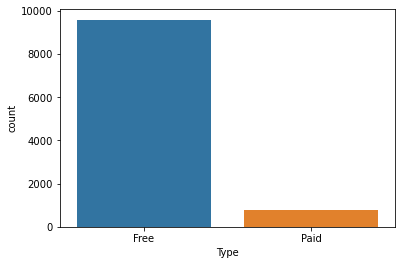

In [78]:
### App `Type` distribution

sns.countplot(df1['Type'])

**Observation:** On playstore there are way more `free` apps than `paid` ones.

In [79]:
### Number of apps encompassed by each `Content Rating`

df1__ = df1.drop_duplicates(subset=['App'])
df1__['Content Rating'].iplot(kind='hist', xTitle='Content Rating', yTitle='Number of Apps', title='Number of Apps under each Content Rating')

**Observation:** It can be said that (from the graph) that 8714 ot of 10,839 apps on playstore can be used by everyone.

In [80]:
### Since it's not clearly visible on graph the number of `Unrated`apps and apps rated `Adults only 18+`
## let's have a closer look

df1__[df1__['Content Rating']=="Adults only 18+"]
# Only 3 apps are rated 'Adults only 18+'

App Category  Rating  Reviews  \
298   Manga Master - Best manga & comic reader   COMICS     4.6  24005.0   
3043         DraftKings - Daily Fantasy Sports   SPORTS     4.5  50017.0   
6424                               Manga Books   COMICS     3.8   7326.0   

      Size (in MB)  Installs  Type  Price (in $)   Content Rating  Genres  
298            4.9    500000  Free           0.0  Adults only 18+  Comics  
3043          41.0   1000000  Free           0.0  Adults only 18+  Sports  
6424          13.0    500000  Free           0.0  Adults only 18+  Comics

In [81]:
df1__[df1__['Content Rating']=="Unrated"]
# Merely 2 apps are unrated

App Category  Rating  Reviews  Size (in MB)  \
7312     Best CG Photography   FAMILY     4.3      1.0           2.5   
8266  DC Universe Online Map    TOOLS     4.1   1186.0           6.4   

      Installs  Type  Price (in $) Content Rating         Genres  
7312       500  Free           0.0        Unrated  Entertainment  
8266     50000  Free           0.0        Unrated          Tools

In [82]:
# let's have a look at `Gernes` of apps on playstore
len(df1['Genres'].unique())

# 119 unique Genres

119

In [83]:
cat_cols

Index(['App', 'Category', 'Type', 'Content Rating', 'Genres'], dtype='object')

In [84]:
### Number of Apps for each `Genre`

df1__['Genres'].iplot(kind='hist', xTitle='Genre', yTitle='Number of Apps', title='Number of Apps for each Genre')

**Observation:** On playstore, Most number of app are of `Tools` genre.

In [85]:
cf.themes

<module 'cufflinks.themes' from 'C:\\Users\\Admin\\anaconda3\\lib\\site-packages\\cufflinks\\themes.py'>

In [86]:
# Show the distribution of apps in term of their rating, size and type

df1[['Size (in MB)','Rating','Type']].iplot(x='Size (in MB)', xTitle='Size (in MB)', y='Rating', yTitle='Rating', kind='scatter', mode='markers', categories="Type")

In [87]:
### Numerical Columns

**Observations:**

In [88]:
### Distribution of Rating

df1__ = df1.drop_duplicates(subset=['App']) # dataset containing unique apps only

df1__['Rating'].iplot(kind='hist', xTitle='Rating', yTitle='Number of Apps', title='Distribution of Rating', dimensions=(500,300))

- `Rating` column has left skewness. And it even needs some outliers treatment.
- Most number of Apps on playstore are having rating of 4.3 (or more than 4 but less than 4.5).

In [89]:
df1['Rating'].skew()

-2.0450289828048636

In [90]:
### Distribution of Size of apps

df1__ = df1.drop_duplicates(subset=['App']) # dataset containing unique apps only

df1__['Size (in MB)'].iplot(kind='hist', xTitle='Size (in MB)', yTitle='Number of Apps', dimensions=(500,300))

- `Size (in MB)` column has right skewness and even it needs the outliers treatment.
- The majority of apps on playstore are greater than 12 MB in size. Notable number of app lies in size range of 2-3.9 MBs.
- Very least number of apps on playstore are greater than 50 Mbs of size.

In [91]:
df1['Size (in MB)'].skew()

1.8157306466588088

In [92]:
### All remaining numerical columns are having right skews

for i in ['Reviews', 'Price (in $)', 'Installs']:
    print(f'skew of {i}: ', df1[i].skew())

skew of Reviews:  17.46650629544988
skew of Price (in $):  23.323250291914242
skew of Installs:  10.1262116913423


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

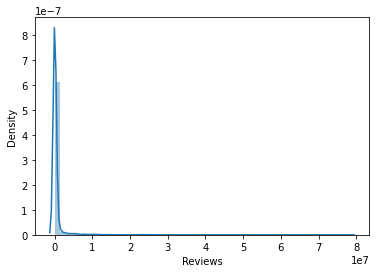

In [93]:
sns.distplot(df1['Reviews'])

<AxesSubplot:xlabel='Price (in $)', ylabel='Density'>

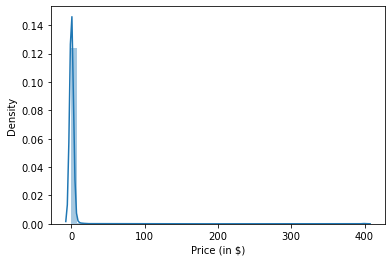

In [94]:
sns.distplot(df1['Price (in $)'])

<AxesSubplot:xlabel='Installs', ylabel='Density'>

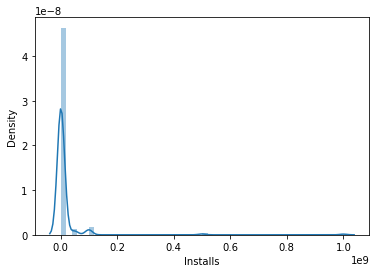

In [95]:
sns.distplot(df1['Installs'])

In [96]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size (in MB)', 'Installs',
       'Type', 'Price (in $)', 'Content Rating', 'Genres'],
      dtype='object')

### # When one would go on playstore, the very first notion one would typically consider regarding downloading or `installing` an app would be its `Rating`. 

Let's have a closer look from that perspective.

In [97]:
### Rating vs Installs

df1.iplot(x="Rating", xTitle='Rating', y="Installs", yTitle='Installs', title='Rating v/s Installs', kind='scatter', mode='markers', dimensions=(500, 300))

**Observations:** It can be interepreted that apps rated in range (3.9, 4.5) have gotten most number of installs.

## # Let's Ask some questions and answer them accordingly..

- ### Top 5 apps getting most number of Installs

In [98]:
top5installs = df1.groupby('App')[['Installs']].sum().sort_values(by=['Installs'], ascending=False).head()
top5installs

Installs
App                                     
Subway Surfers                5000000000
Hangouts                      4000000000
Google Photos                 4000000000
Google Chrome: Fast & Secure  3000000000
Google Drive                  3000000000

In [99]:
print("Top 5 apps getting most number of installs are: ", set(top5installs.index))

Top 5 apps getting most number of installs are:  {'Google Chrome: Fast & Secure', 'Subway Surfers', 'Hangouts', 'Google Photos', 'Google Drive'}


- ### Top 5 Reviewed apps

In [100]:
top5reviewed = df1.groupby('App')[['Reviews']].sum().sort_values(by=['Reviews'], ascending=False).head()
top5reviewed

Reviews
App                            
Instagram           199664676.0
Facebook            156286514.0
Subway Surfers      138606606.0
WhatsApp Messenger  138228988.0
Clash of Clans      134667058.0

In [101]:
print("Top 5 apps getting most number of reviews are: ", set(top5reviewed.index))

Top 5 apps getting most number of reviews are:  {'Instagram', 'WhatsApp Messenger', 'Clash of Clans', 'Facebook', 'Subway Surfers'}


- ### Topmost 5 expensive apps

In [102]:
top5expensive = df1.groupby('App')[['Price (in $)']].sum().sort_values(by=['Price (in $)'], ascending=False).head()
top5expensive

Price (in $)
App                                            
I'm Rich - Trump Edition                 400.00
I'm Rich/Eu sou Rico/أنا غني/我很有錢        399.99
most expensive app (H)                   399.99
I am rich                                399.99
I am rich(premium)                       399.99

In [103]:
print("Topmost 5 expensive apps: ", set(top5expensive.index))

Topmost 5 expensive apps:  {"I'm Rich - Trump Edition", 'I am rich(premium)', 'most expensive app (H)', 'I am rich', "I'm Rich/Eu sou Rico/أنا غني/我很有錢"}


- ### Top 3 most expensive `GAME` (category) Apps

In [104]:
top3 = df1[df1['Category']=='GAME'].groupby(['App'])[['Price (in $)']].sum().sort_values(by=['Price (in $)'], ascending=False).head(3)
top3

Price (in $)
App                                  
The World Ends With You         17.99
Trine 2: Complete Story         16.99
Blackjack Verite Drills         14.00

In [105]:
print("Top 3 most expensive GAME (category) Apps: ", set(top3.index))

Top 3 most expensive GAME (category) Apps:  {'The World Ends With You', 'Trine 2: Complete Story', 'Blackjack Verite Drills'}


- ### The 5 apps from the FAMILY category having the lowest rating

In [106]:
lowest5rated = df1[df1['Category']=='FAMILY'].groupby('App')[['Rating']].sum().sort_values(by=['Rating']).head(5)
lowest5rated

Rating
App                                   
FE Mechanical Engineering Prep     1.0
Speech Therapy: F                  1.0
Truck Driving Test Class 3 BC      1.0
AC REMOTE UNIVERSAL-PRO            1.6
BG TV App                          1.7

In [107]:
print("Lowest 5 Rated apps from the `FAMILY` category on the playstore are: ", set(lowest5rated.index))

Lowest 5 Rated apps from the `FAMILY` category on the playstore are:  {'AC REMOTE UNIVERSAL-PRO', 'BG TV App', 'Speech Therapy: F', 'FE Mechanical Engineering Prep', 'Truck Driving Test Class 3 BC'}


# # Outliers Treatment:

It's best to remove outliers only when you have a sound reason for doing so. Some outliers represent natural variations in the population, and they should be left as is in your dataset. These are called true outliers.

<AxesSubplot:>

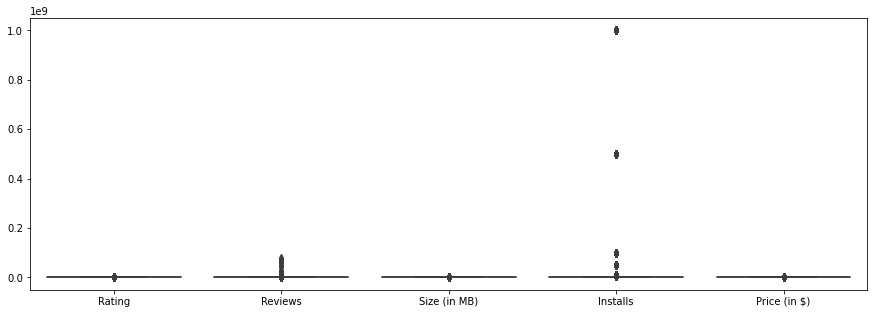

In [108]:
fig = plt.subplots(figsize=(15,5))
sns.boxplot(data = df1[num_cols])

In [109]:
### A function to replace all the outliers by the `np.nan` so that as per the desire they can be imputed or dropped off
def remove_outliers(df):
    """
    A function to replace all outliers of numerical columns by np.nan.
    """
    def fences(df, col):
        """
        To get the lower fences and upper fences of the data to discern the outliers.
        """
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        iqr = Q3-Q1
    
        lf = Q1 - 1.5*iqr # lower fence
        uf = Q3 + 1.5*iqr # upper fence
        return lf, uf
    
    df_new = df.copy(deep=True) # creating a deep copy so that changes won't be reflected in the original dataset
    
    num_cols = [col for col in df.columns if df[col].dtype != 'O']
    for col in num_cols:
        if col=="Price (in $)":
            continue
        lf, uf = fences(df_new, col) # getting fences for each relevant column
        df_new[col] = df_new[col].mask(df_new[col]<=lf, np.nan) # where val is lower than lower_fence
        df_new[col] = df_new[col].mask(df_new[col]>=uf, np.nan) # where val is greater than upper_fence
        
    return df_new

In [110]:
df_new = remove_outliers(df=df1)
df_new.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size (in MB)  Installs  Type  Price (in $) Content Rating  \
0    159.0          19.0   10000.0  Free           0.0       Everyone   
1    967.0          14.0  500000.0  Free           0.0       Everyone   
2  87510.0           8.7       NaN  Free           0.0       Everyone   
3      NaN          25.0       NaN  Free           0.0           Teen   
4    967.0           2.8  100000.0  Free           0.0       Everyone   

                      Genres  
0               Art & Design  
1  Art & Design;Pretend Play  
2               Art & Design  
3               Art & Design  
4    Art & Design;Creativity

In [111]:
### Total records that contain outliers in either of the columns
df_new.isnull().sum().sum()

5990

In [112]:
### Missing records in num_cols of df_new:

for col in num_cols:
    print(f"Missing Values now in df_new[{col}]: ", df_new[col].isna().sum())

Missing Values now in df_new[Rating]:  723
Missing Values now in df_new[Reviews]:  1870
Missing Values now in df_new[Size (in MB)]:  831
Missing Values now in df_new[Installs]:  2566
Missing Values now in df_new[Price (in $)]:  0


**Let's try both approaches:**

1. By dropping the NaN vals. (dataset=df_new1)
2. By imputing the NaN vals by the median of the respective columns. (dataset=df_new2)


In [113]:
### Approach1: dropping NaN records, i.e. loosing areoun 40 percent of the data, which might not be an ideal choice

df_new1= df_new.dropna()
df_new1.head()

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   
4           Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                      Paper flowers instructions  ART_AND_DESIGN     4.4   
6         Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   

   Reviews  Size (in MB)  Installs  Type  Price (in $) Content Rating  \
0    159.0          19.0   10000.0  Free           0.0       Everyone   
1    967.0          14.0  500000.0  Free           0.0       Everyone   
4    967.0           2.8  100000.0  Free           0.0       Everyone   
5    167.0           5.6   50000.0  Free           0.0       Everyone   
6    178.0          19.0   50000.0  Free           0.0       Everyone   

                      Genres  
0               Art & Design  
1  Art & Design;Pretend Play  
4    Art & Design;Creativity  
5               Art & Design  
6               Art & Design

<AxesSubplot:>

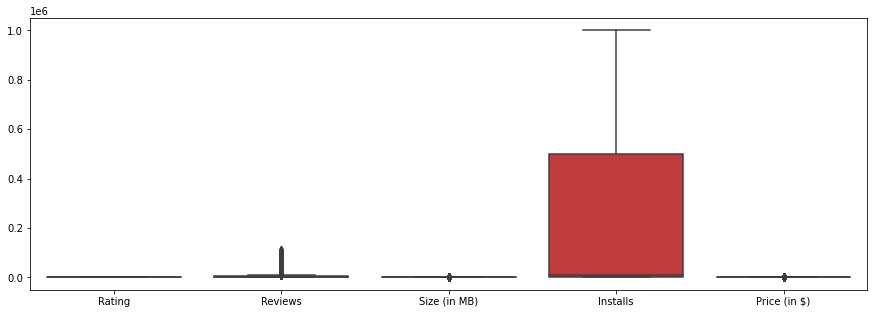

In [114]:
fig = plt.subplots(figsize=(15,5))
sns.boxplot(data = df_new1[num_cols])

### Almost all outliers have been taken care of

As y'all can see, most of the outliers have been taken care of!

In [115]:
### Approach 2: Imputing then outliers (and now NaN), by median of their respective columns.

def impute_them_all(data):
    """
    Imputing then outliers (and now NaN), by median of their respective columns
    """
    num_cols = [col for col in data.columns if data[col].dtype!='O']
    
    data_new = data.copy(deep=True)

    for col in num_cols:
        data_new[col].mask(data[col].isnull(), data[col].median(), inplace=True)
        
    return data_new

In [116]:
### Updating the our dataset with newly imputed values

df_new = impute_them_all(df_new)
df_new.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size (in MB)  Installs  Type  Price (in $) Content Rating  \
0    159.0          19.0   10000.0  Free           0.0       Everyone   
1    967.0          14.0  500000.0  Free           0.0       Everyone   
2  87510.0           8.7   10000.0  Free           0.0       Everyone   
3    398.5          25.0   10000.0  Free           0.0           Teen   
4    967.0           2.8  100000.0  Free           0.0       Everyone   

                      Genres  
0               Art & Design  
1  Art & Design;Pretend Play  
2               Art & Design  
3               Art & Design  
4    Art & Design;Creativity

In [117]:
df_new.isnull().sum()

### No missing values whatsoever!

App               0
Category          0
Rating            0
Reviews           0
Size (in MB)      0
Installs          0
Type              0
Price (in $)      0
Content Rating    0
Genres            0
dtype: int64

<AxesSubplot:>

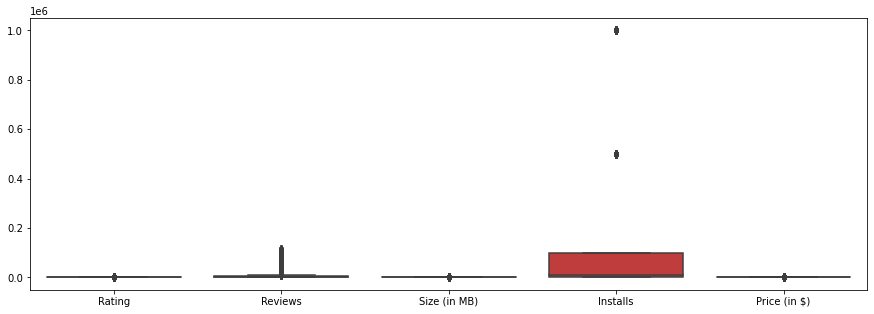

In [118]:
fig = plt.subplots(figsize=(15,5))
sns.boxplot(data = df_new)

Exact same results that we got from the prior approach and as such almost all outliers have been taken care of.

## # Standardization:

- ### Standardization using StandardScaling technique

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
scaler = StandardScaler()

In [121]:
standardized_cols = scaler.fit_transform(df1[num_cols])
standardized_cols

array([[-0.21360932, -0.1504704 , -0.05076282, -0.17633632, -0.06332845],
       [-0.62547641, -0.15017079, -0.2886329 , -0.1702296 , -0.06332845],
       [ 1.02199194, -0.11807949, -0.54077518, -0.11414745, -0.06332845],
       ...,
       [ 0.19825777, -0.15052825, -0.50271596, -0.17644849, -0.06332845],
       [ 0.61012485, -0.15048709, -0.33620691, -0.17644849, -0.06332845],
       [ 0.61012485, -0.00283183, -0.05076282, -0.05183395, -0.06332845]])

In [122]:
pd.DataFrame(standardized_cols).iplot(kind='hist', subplots=True)

- ### Standardization using MinMaxScaling technique

In [123]:
from sklearn.preprocessing import MinMaxScaler

In [124]:
minmax_scaler = MinMaxScaler()
minmax_scaler

MinMaxScaler()

In [125]:
standardizedCols = minmax_scaler.fit_transform(df_new[num_cols])
standardizedCols

array([[4.00000000e-01, 1.37337721e-03, 3.39187763e-01, 1.00000000e-02,
        0.00000000e+00],
       [2.66666667e-01, 8.35255198e-03, 2.49888812e-01, 5.00000000e-01,
        0.00000000e+00],
       [8.00000000e-01, 7.55875722e-01, 1.55231924e-01, 1.00000000e-02,
        0.00000000e+00],
       ...,
       [5.33333333e-01, 2.59127776e-05, 1.69519757e-01, 1.00000000e-03,
        0.00000000e+00],
       [6.66666667e-01, 9.84685548e-04, 2.32029022e-01, 1.00000000e-03,
        0.00000000e+00],
       [6.66666667e-01, 3.44208062e-03, 3.39187763e-01, 1.00000000e-02,
        0.00000000e+00]])

### # So according to the need of the problem, we can standardize the columns by either of the technique and map them to the original dataset.

## # Checking for `Multicollinearity`

**Multicollinearity:** To check if the independent variables are having linear relationships and if they are then we can drop irrelevant features or perform `dimensionality reduction technique`.

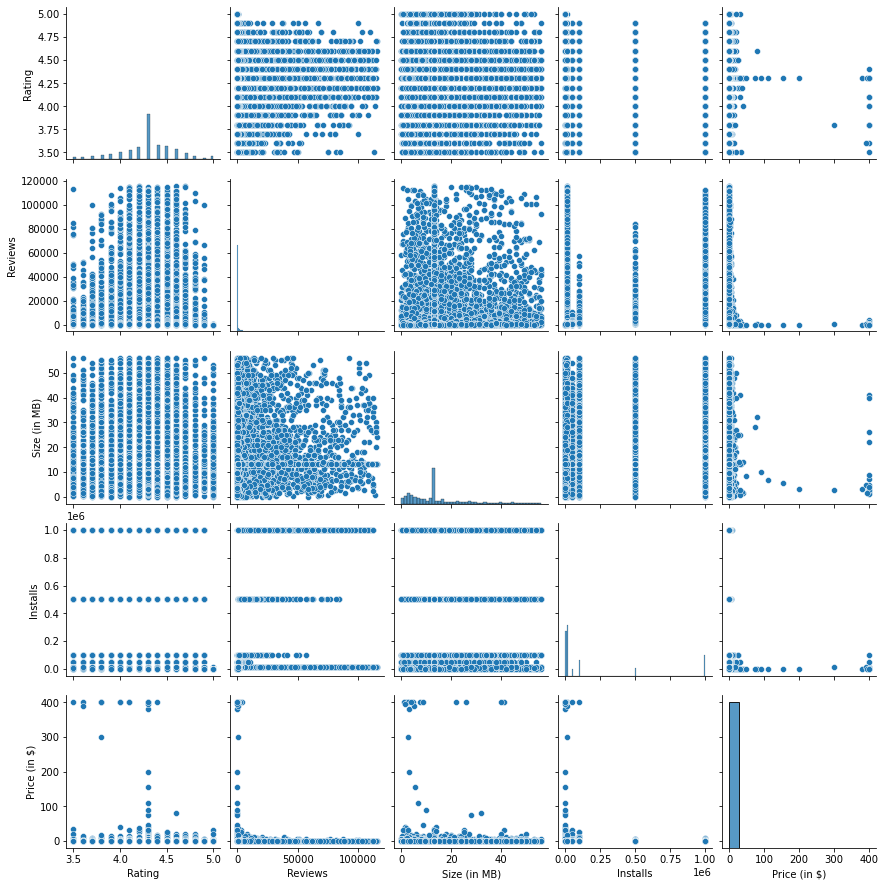

In [126]:
sns.pairplot(df_new)

In [127]:
df_new[num_cols].corr()

Rating   Reviews  Size (in MB)  Installs  Price (in $)
Rating        1.000000 -0.021795     -0.020958 -0.084964     -0.036464
Reviews      -0.021795  1.000000      0.090403  0.354843     -0.023757
Size (in MB) -0.020958  0.090403      1.000000  0.092878     -0.017436
Installs     -0.084964  0.354843      0.092878  1.000000     -0.029844
Price (in $) -0.036464 -0.023757     -0.017436 -0.029844      1.000000

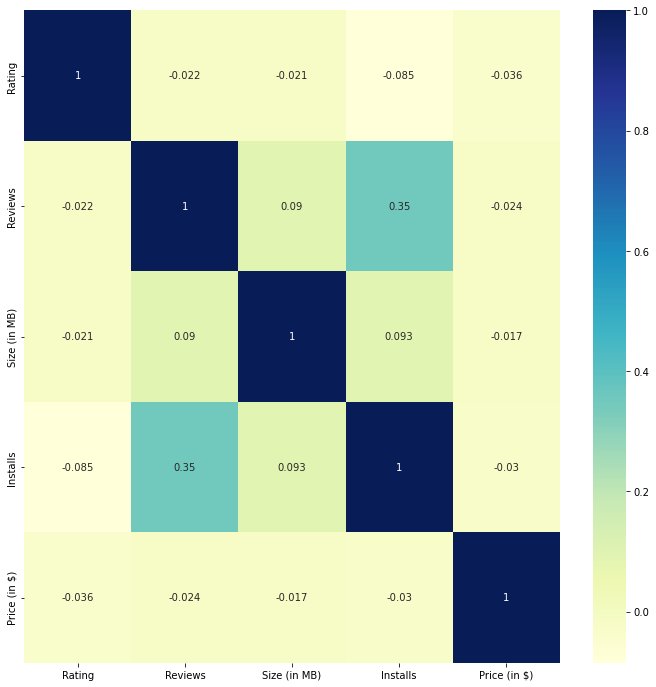

In [128]:
fig = plt.figure() 

# Figure size
fig.set_size_inches(12, 12)

# plotting correlation heatmap
sns.heatmap(df_new[num_cols].corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

**Observation:** None of the columns are strognly correlated with any of the other columns. To have strong correlation with other columns they must have `Pearson coefficient`>= 0.9 or <=-0.9.<br>And as such there is no need to remove any of the columns.